In [1]:
import pandas as pd
import datetime
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint as rn
import numpy as np

In [2]:
df = pd.read_excel('data.xlsx')

In [3]:
df_active = df.loc[df['Дата'] == datetime(2018, 4, 17)].copy()

In [4]:
df_active['Час'].dtype

dtype('O')

In [5]:
df_active['Time'] = df_active['Час'].astype('str')

In [6]:
df_active.Time = df_active.Time.str.slice(3, 5)

In [7]:
df_active = df_active.loc[df_active.Time.isin(['00', '10', '20', '30', '40', '50'])].copy()

In [8]:
df_active = df_active[['Час', 'Глобальне освітлення']].copy()

In [9]:
df_active.reset_index(inplace=True, drop=True)
df_active.rename(columns={'Час': 'Time', 'Глобальне освітлення': 'Value'}, inplace=True)

In [10]:
df_active = df_active.loc[df_active.Value > 0]

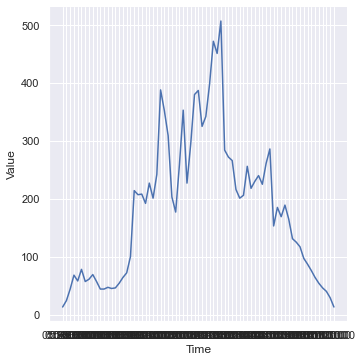

In [11]:
df_active['Time'] = df_active['Time'].astype('str')
sns.set_theme(style="darkgrid")
sns.relplot(data=df_active, x='Time', y='Value', kind='line')

In [12]:
df = df_active.copy()
df_active.to_pickle('data.pickle')
len(df_active)

73

In [13]:
for i in range(int(np.ceil(len(df) * 0.2))):
    position = rn(0, len(df) + 1)
    df.at[position, 'Value'] = np.nan
df

,Time,Value
0,05:30:00,NaN
1,05:40:00,24.0
2,05:50:00,44.0
3,06:00:00,68.0
4,06:10:00,58.0
...,...,...
68,16:50:00,54.0
69,17:00:00,46.0
70,17:10:00,NaN
71,17:20:00,29.0


In [14]:
df.isna().sum().loc[df.isna().sum() > 0].sort_values(ascending=True)

Value    12
dtype: int64

In [15]:
df_res = df.copy()